469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 112ms/step - accuracy: 0.8598 - loss: 0.4846 - val_accuracy: 0.9843 - val_loss: 0.0523


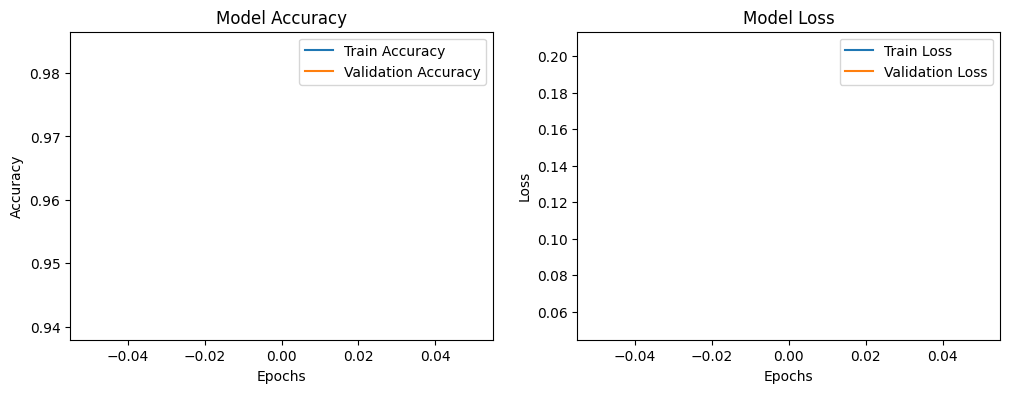

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9816 - loss: 0.0601
Test Accuracy: 0.9843
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Predicted classes: [7 2 1 ... 4 5 6]


In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocessing: Reshape and normalize the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255.0

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define the CNN model
model = models.Sequential()

# Convolutional layer 1
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the data
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(128, activation='relu'))

# Output layer (softmax for multi-class classification)
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN
history = model.fit(X_train, y_train, epochs=1, batch_size=128, validation_data=(X_test, y_test), verbose=1)

# Plot the training and validation accuracy/loss
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Make predictions
predictions = model.predict(X_test)

# Convert probabilities to class labels (for multi-class)
predicted_classes = predictions.argmax(axis=1)

# Print predicted classes
print("Predicted classes:", predicted_classes)


Epoch 1/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 14s 123ms/step - accuracy: 0.9626 - loss: 0.1342 - val_accuracy: 0.9986 - val_loss: 0.0035
Epoch 2/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - accuracy: 0.9992 - loss: 0.0025 - val_accuracy: 0.9991 - val_loss: 0.0015
Epoch 3/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 12s 119ms/step - accuracy: 0.9989 - loss: 0.0024 - val_accuracy: 0.9986 - val_loss: 0.0030
Epoch 4/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 21s 121ms/step - accuracy: 0.9991 - loss: 0.0020 - val_accuracy: 0.9995 - val_loss: 0.0021
Epoch 5/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 20s 116ms/step - accuracy: 0.9999 - loss: 4.6774e-04 - val_accuracy: 0.9986 - val_loss: 0.0047


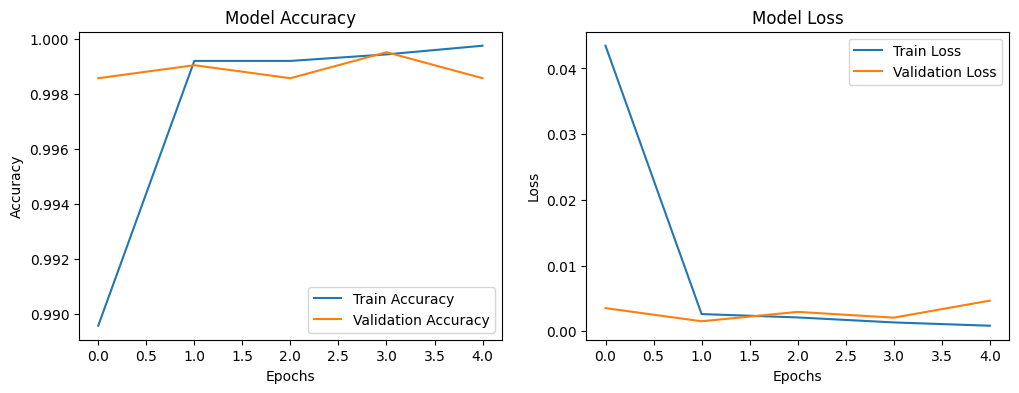

67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9997 - loss: 8.0933e-04
Test Accuracy: 0.9986
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Predicted classes: [1 0 1 ... 1 0 1]


In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Convert the problem to binary classification (distinguish between digit '0' and '1')
binary_train_indices = np.where((y_train == 0) | (y_train == 1))
binary_test_indices = np.where((y_test == 0) | (y_test == 1))

X_train, y_train = X_train[binary_train_indices], y_train[binary_train_indices]
X_test, y_test = X_test[binary_test_indices], y_test[binary_test_indices]

# Preprocessing: Reshape and normalize the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255.0

# Convert labels to binary (0 or 1)
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Define the CNN model
model = models.Sequential()

# Convolutional layer 1
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the data
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(128, activation='relu'))

# Output layer for binary classification
model.add(layers.Dense(1, activation='sigmoid'))  # Single neuron with sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test), verbose=1)

# Plot the training and validation accuracy/loss
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Make predictions
predictions = model.predict(X_test)

# Convert probabilities to binary class labels
predicted_classes = (predictions > 0.5).astype(int)

# Print predicted classes
print("Predicted classes:", predicted_classes.flatten())
